## Analisi Diffusione COVID-19 
### Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset <a id = "https://github.com/owid/covid-19-data/tree/master/public/data">covid-19-data</a>
1. Download "our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce. Si richiede di verificare le dimensioni del dataset e i relativi metadati<br>
2. Si chiede di trovare, per ogni continente:<br>
    a. il numero di casi fin dall'inizio della pandemia<br>
    b. la percentuale rispetto al totale mondiale del numero di casi
3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:<br>
    a. l'evoluzione del casi totali dall'inizio alla fine dell'anno<br>
    b. il numero di nuovi casi rispetto alla data; poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni;<br>
4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)<br>
a. scrivere un breve commento a riguardo
5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:<br>
   a. mostrare la somma dei pazienti ospitalizzati per ognuna<br>
   b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

<h4>1. Download "our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce. Si richiede di verificare le dimensioni del dataset e i relativi metadati<br></h4>

In [326]:
import pandas as pd # import di pandas
import seaborn as sns # import di seaborn
cd = pd.read_csv("owid-covid-data.csv") # lettura del database e importazione in un dataframe
cd.shape # verifica delle dimensioni del dataset

(429435, 67)

In [328]:
cd.columns # verifica dei metadati presenti nel dataset

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<h4>2. Si chiede di trovare, per ogni continente:</h4>
    a. il numero di casi fin dall'inizio della pandemia<br>
    b. la percentuale rispetto al totale mondiale del numero di casi

In [330]:
cd_by_continent = cd.groupby(["continent"])["new_cases"].sum() # raggruppamento dei nuovi casi divisi per continente
tc = cd_by_continent.sum() # somma totale dei casi per continente
cd_by_continent_df = cd_by_continent.reset_index() # conversione in dataframe
cd_by_continent_df.columns = ["Continent", "Total Cases"] # selezione delle colonne da analizzare
cd_by_continent_df["Percentage"] = (cd_by_continent_df["Total Cases"] / tc) * 100 # calcolo della percentuale dei casi rispetto al totale mondiale
pd.options.display.float_format = '{:,.0f}'.format # conversione del formato percentuale in float con due decimali
display(cd_by_continent_df.style.format({"Total Cases":"{:,.0f}","Percentage": "{:.2f}%"})) #stampa del dataframe

,Continent,Total Cases,Percentage
0,Africa,"13,146,831",1.69%
1,Asia,"301,564,180",38.86%
2,Europe,"252,916,868",32.60%
3,North America,"124,492,698",16.04%
4,Oceania,"15,003,468",1.93%
5,South America,"68,811,012",8.87%


<h4>3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:</h4>
    a. l'evoluzione del casi totali dall'inizio alla fine dell'anno<br>
    b. il numero di nuovi casi rispetto alla data; poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni;<br>

In [332]:
cd["date"] = pd.to_datetime(cd.loc[:,"date"]) # conversione della data a formato data
cdIT = cd[(cd["location"]== "Italy") & (cd["date"].dt.year == 2022)] # filtro sul paese Italia e anno 2022

[Text(0.5, 1.0, "Totale casi COVID per l'anno 2022"),
 Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Casi totali')]

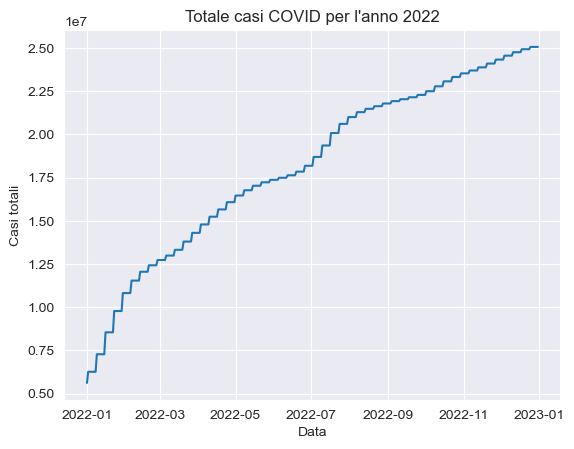

In [334]:
sns.lineplot(data=cdIT[cdIT["total_cases"] > 0], x = "date", y = "total_cases").set(title = "Totale casi COVID per l'anno 2022", xlabel="Data",ylabel = "Casi totali") # creazione del grafico lineplot per mostrare il totale in crescita dei casi nell'arco del 2023

[Text(0.5, 1.0, 'Andamento nuovi casi 2022'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Rate')]

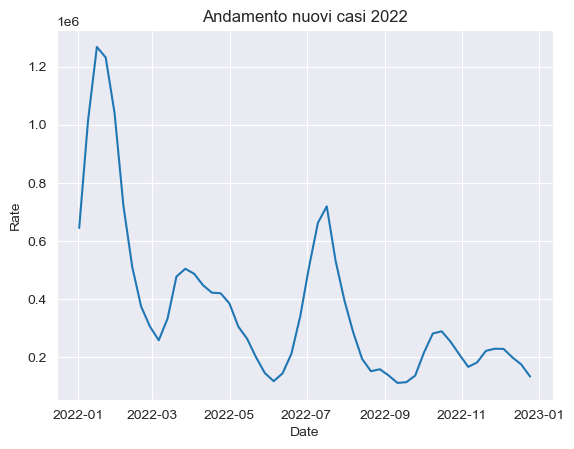

In [336]:
sns.lineplot(data=cdIT[cdIT["new_cases"] > 0], x="date", y = "new_cases").set(title='Andamento nuovi casi 2022', xlabel='Date', ylabel='Rate') # creazione lineplot con i nuovi casi per il 2022 senza valori nulli

<h4>4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)</h4>
a. scrivere un breve commento a riguardo

[Text(0.5, 1.0, 'Distribuzione dei pazienti in terapia intensiva per paese'),
 Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Admissions')]

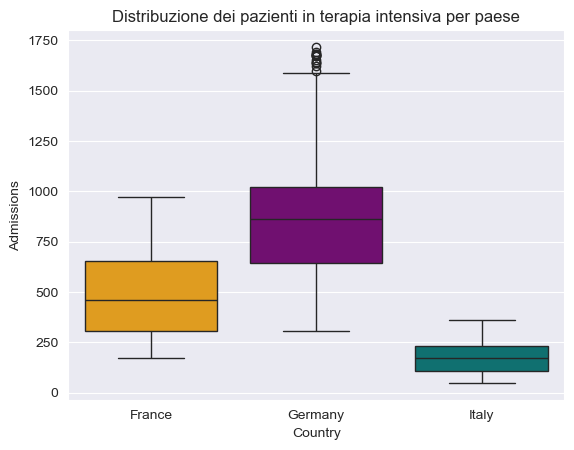

In [338]:
start_date= "2022-05-01" # stabilita data di inizio analisi
end_date = "2023-04-30" # stabilita data di fine analisi
countries = ["Italy", "Germany", "France"] # creata una lista dei paesi da prendere in esame
icu_ITFRGE = cd[cd["location"].isin(countries) & (cd["date"] >= pd.Timestamp(start_date)) & (cd["date"] <= pd.Timestamp(end_date))] # creazione del filtro
sns.set_style("darkgrid") # creazione del boxplot in Seaborn
palette_col = {"Italy": "teal", "Germany": "purple", "France": "orange"}
sns.boxplot(data=icu_ITFRGE, x="location", y="weekly_icu_admissions",hue="location", palette=palette_col).set(title="Distribuzione dei pazienti in terapia intensiva per paese", xlabel="Country", ylabel="Admissions")

<h4><b>Commento</b></h4>
Possiamo vedere dai dati come ci sia una grossa differenza tra i ricoveri in terapia intensiva tra i vari paesi, e soprattutto tra Italia e Germania. Inoltre, la Germania presenta un numero di valori anomali (outliers) che si estendono oltre il baffo superiore; questo potrebbe essere dovuto al fatto che il valore massimo delle terapie intensive in Germania e' molto piu' alto del valore massimo interquartile evidenziato dal baffo.<br>Questi valori necessitano di una analisi piu' approfondita al fine di capire se sono picchi anomali o errori nei dati.

<h4>5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:</h4>
a. mostrare la somma dei pazienti ospitalizzati per ognuna<br>
b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [342]:
countries2 = ["Italy", "Germany", "France", "Spain"] # creata una lista con i paesi necessari
hosp = cd[cd["location"].isin(countries2) & (cd["date"].dt.year == 2023)] # creato un filtro che recuperi solo i paesi nella lista e i dati riferiti al 2023
pivot = hosp.pivot_table(index="date", columns = "location" , values = "hosp_patients") # creata una pivot per avere un'idea generale del dataframe
display(pivot)

location,France,Italy,Spain
date,,,
2023-01-01,"24,157","8,281","3,301"
2023-01-02,"24,075","8,409","3,396"
2023-01-03,"23,516","8,358","3,432"
2023-01-04,"23,167","8,287","3,417"
2023-01-05,"22,664","8,035","3,403"
...,...,...,...
2023-12-27,NaN,"7,115",NaN
2023-12-28,NaN,"7,011",NaN
2023-12-29,NaN,"6,876",NaN


[Text(0.5, 1.0, 'Distribuzione dei pazienti ospedalizzati per paese nel 2023'),
 Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Patients')]

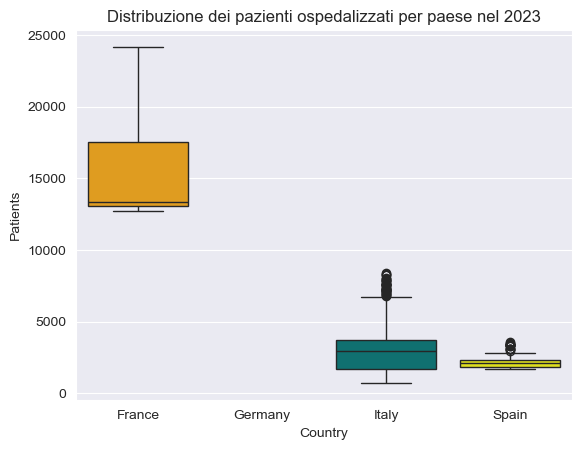

In [265]:
sns.set_style("darkgrid") # creazione di boxplot tramite Seaborn per visualizzare i dati
palette_col = {"Italy": "teal", "Germany": "purple", "France": "orange", "Spain": "Yellow"}
sns.boxplot(data=hosp, x="location", y="hosp_patients",hue="location", palette=palette_col).set(title="Distribuzione dei pazienti ospedalizzati per paese nel 2023", xlabel="Country", ylabel="Patients")

<h4><b>Commento</b></h4>
Possiamo verificare che i dati per la Germania riguardo ai pazienti ospedalizzati sono completamente assenti. Per questo motivo non e' possibile effettuare una sostituzione, ma i dati mancanti andranno recuperati da valide fonti alternative in modo da poter avere una panoramica piu' accurata del dato in questione.

In [344]:
cd[cd["location"] == "Germany"]["hosp_patients"].notnull().sum() # verifica che i valori della colonna hosp_patients e' vuota per la Germania

0